Example of Euler's method
---
<div>
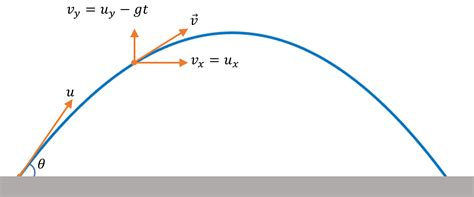
</div>

This example supersedes the starter code described in the README.md file 

In [1]:
vinit = 10 # m/s
theta0 = 45 # degrees
dt = 0.01 # seconds

In [2]:
print("Simulating projectile motion with params:")
print("(vinit,theta0,dt)=(%7.2lf,%7.2f,%7.2f)" % (vinit,theta0,dt))

Simulating projectile motion with params:
(vinit,theta0,dt)=(  10.00,  45.00,   0.01)


In [3]:
from matplotlib import pyplot as plt
from math import sin,cos,pi
import numpy as np

In [4]:
# initial coordinate values: position and velocity 
#  x y          vx                         vy
y0=[0.,0.,vinit*cos(theta0*pi/180),vinit*sin(theta0*pi/180)]
# acceleration due to gravity
g=9.81  # m/s^2

In [5]:
# the functions = derivatives of the coortinates wrt t
def f0(t,y):
    return y[2]  # v_x
def f1(t,y):
    return y[3]  # v_y
def f2(t,y):
    return 0     # acceleration in x
def f3(t,y):
    return -g    # acceleration in y

In [6]:
t=[0]   # keep track of steps in time
y=y0[:] # copy the starting coordinates
trajectory=np.asarray([y0]) # store trajectory

In [7]:
# propagate our projectile
while y[1]>=0:
    y[0]= y[0]+f0(t[-1],y)*dt
    y[1]= y[1]+f1(t[-1],y)*dt
    y[2]= y[2]+f2(t[-1],y)*dt
    y[3]= y[3]+f3(t[-1],y)*dt
    t.append(t[-1]+dt)
    trajectory=np.append(trajectory,[y],axis=0)

In [8]:
# get trajectories for each coordinate
sx = trajectory[:,0] 
sy = trajectory[:,1]
vx = trajectory[:,2]
vy = trajectory[:,3]

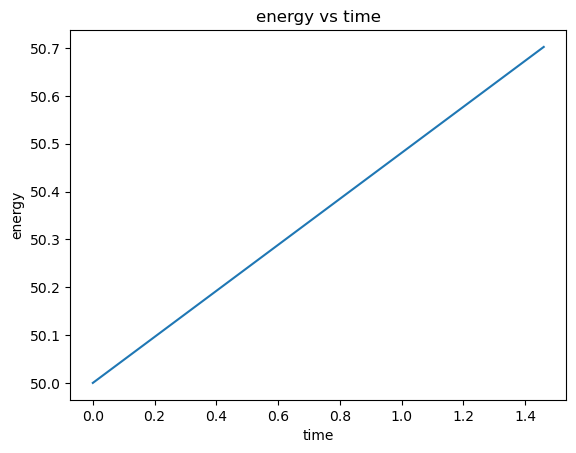

In [11]:
energy=[]
for i in range(0,len(vx)):
    ke = ((vx[i])**(2)+(vy[i])**(2))/2
    pe = g*sy[i]
    energy.append(ke+pe)
plt.plot(t, energy)
plt.title("energy vs time"),plt.xlabel("time"),plt.ylabel("energy");


The total energy is increasing slightly as time passes, which is not accurate.

Study and assess the performance of the Euler algorithm, you can do this in a variety of ways, for example:

* Observe the calculated landing location versus the time step (similarly the error wrt the analytic solution).
* Can you find a time step where the landing location is a “pretty good” match to the expected position?
* Is this observation stable with changes to the initial conditions?
* Plot the difference in x and y position (or velocity) versus time compared to the analytic solution
* Plot the energy of the projectile versus time
* …


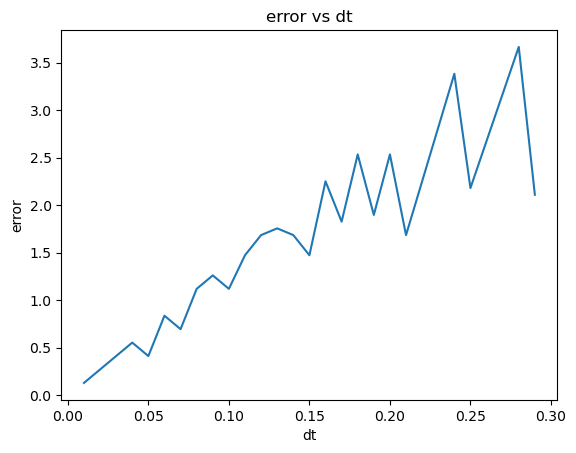

In [19]:
aSol = 10.19368
landingLocs=[]
dtvalues=[]
startingdt = 0.01
while startingdt<=0.3:
    dtvalues.append(round(startingdt,2))
    startingdt+=0.01
for dt in dtvalues:
    t=[0]   # keep track of steps in time
    y=y0[:] # copy the starting coordinates
    trajectory=np.asarray([y0]) # store trajectory
    # propagate our projectile
    while y[1]>=0:
        y[0]= y[0]+f0(t[-1],y)*dt
        y[1]= y[1]+f1(t[-1],y)*dt
        y[2]= y[2]+f2(t[-1],y)*dt
        y[3]= y[3]+f3(t[-1],y)*dt
        t.append(t[-1]+dt)
        trajectory=np.append(trajectory,[y],axis=0)
    sx = trajectory[:,0] 
    landingLocs.append(sx[-1])
#print(dtvalues)
error = [item - aSol for item in landingLocs]
plt.plot(dtvalues, error)
plt.title("error vs dt"),plt.xlabel("dt"),plt.ylabel("error");

As expected when the step size is increased, the error increases. The error fluctuates more as the step size increases.